In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('insurance.csv')

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df['region'].value_counts().to_frame()

,region
southeast,364
southwest,325
northwest,325
northeast,324


In [51]:
df.reset_index(inplace=True)
df.set_index('index', inplace=True)

In [52]:
labelencoder = LabelEncoder()

In [53]:
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df = pd.get_dummies(data=df, columns=['region'])

In [54]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
index,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0


In [55]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [56]:
Spearman_correlation_matrix = df.corr(method='spearman')
Spearman_correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,0.534392,-0.000149,0.002683,-0.015273,0.013315
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,0.009490,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,0.119396,-0.133115,-0.127168,0.249037,0.001710
children,0.056992,0.015589,0.015607,1.000000,0.016583,0.133339,-0.025690,0.034465,-0.019531,0.011466
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,0.663460,0.002811,-0.036945,0.068498,-0.036945
charges,0.534392,0.009490,0.119396,0.133339,0.663460,1.000000,0.046109,-0.021634,0.017275,-0.042354
region_northeast,-0.000149,-0.002425,-0.133115,-0.025690,0.002811,0.046109,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,0.002683,-0.011156,-0.127168,0.034465,-0.036945,-0.021634,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.015273,0.017117,0.249037,-0.019531,0.068498,0.017275,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.013315,-0.004184,0.001710,0.011466,-0.036945,-0.042354,-0.320177,-0.320829,-0.346265,1.000000


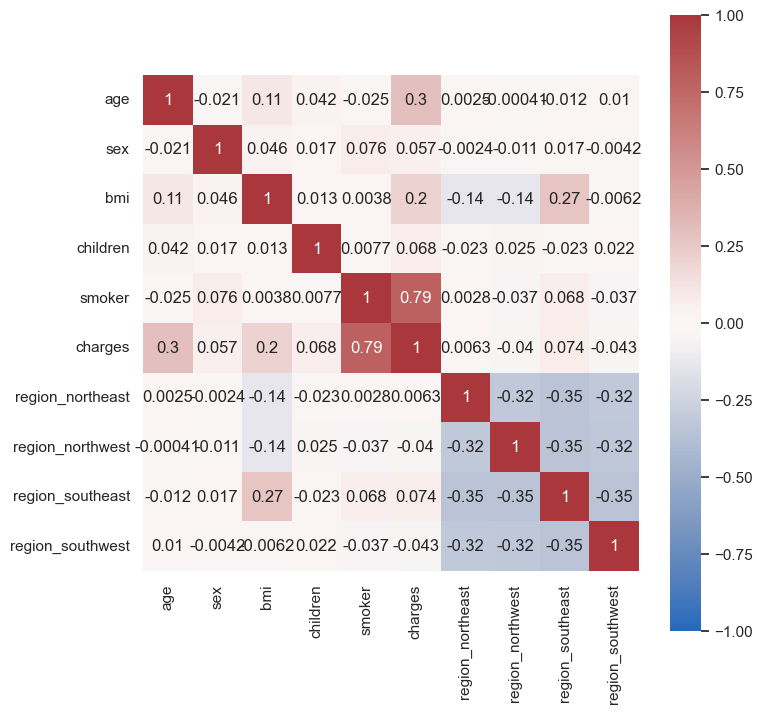

In [57]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

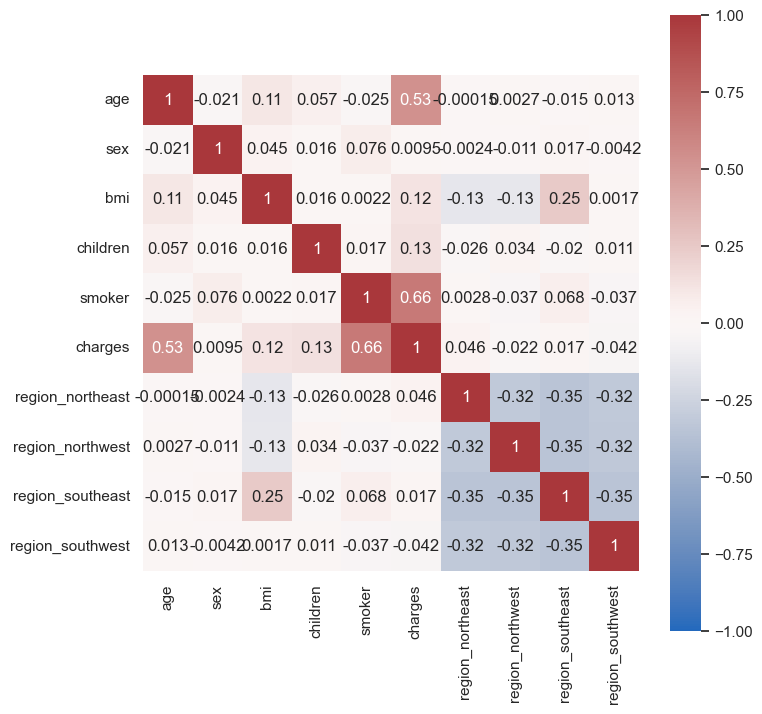

In [58]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    Spearman_correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

In [59]:
df.isnull().values.any()

False

In [60]:
bmi = pd.DataFrame(
    [
    {"BMI": "< 18.5", "Condition": "Underweight"},
    {"BMI": "18.5 - 24.9", "Condition": "Healthy weight"},
    {"BMI": "25.0 - 29.9", "Condition": "Overweight"},
    {"BMI": "35 > X > 30", "Condition": "Obesity, class 1"},
    {"BMI": "40 > X > 35", "Condition": "Obesity, class 2"},
    {"BMI": "< 40", "Condition": "Obesity, class 3"}
    ]
)
bmi

,BMI,Condition
0,< 18.5,Underweight
1,18.5 - 24.9,Healthy weight
2,25.0 - 29.9,Overweight
3,35 > X > 30,"Obesity, class 1"
4,40 > X > 35,"Obesity, class 2"
5,< 40,"Obesity, class 3"


In [61]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35) & (df['bmi'] < 40),
    (df['bmi'] >= 40) & (df['bmi'] < 45),
    (df['bmi'] >= 45)
]

results = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity, class 1', 'Obesity, class 2', 'Obesity, class 3']

df['BMI'] = np.select(conditions, results)

In [62]:
df['BMI'].value_counts().to_frame()

,BMI
Overweight,391
Healthy weight,386
Underweight,245
"Obesity, class 1",225
"Obesity, class 2",71
"Obesity, class 3",20


In [63]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1,Healthy weight
1,18,1,33.770,1,0,1725.55230,0,0,1,0,Overweight
2,28,1,33.000,3,0,4449.46200,0,0,1,0,Overweight
3,33,1,22.705,0,0,21984.47061,0,1,0,0,Underweight
4,32,1,28.880,0,0,3866.85520,0,1,0,0,Healthy weight


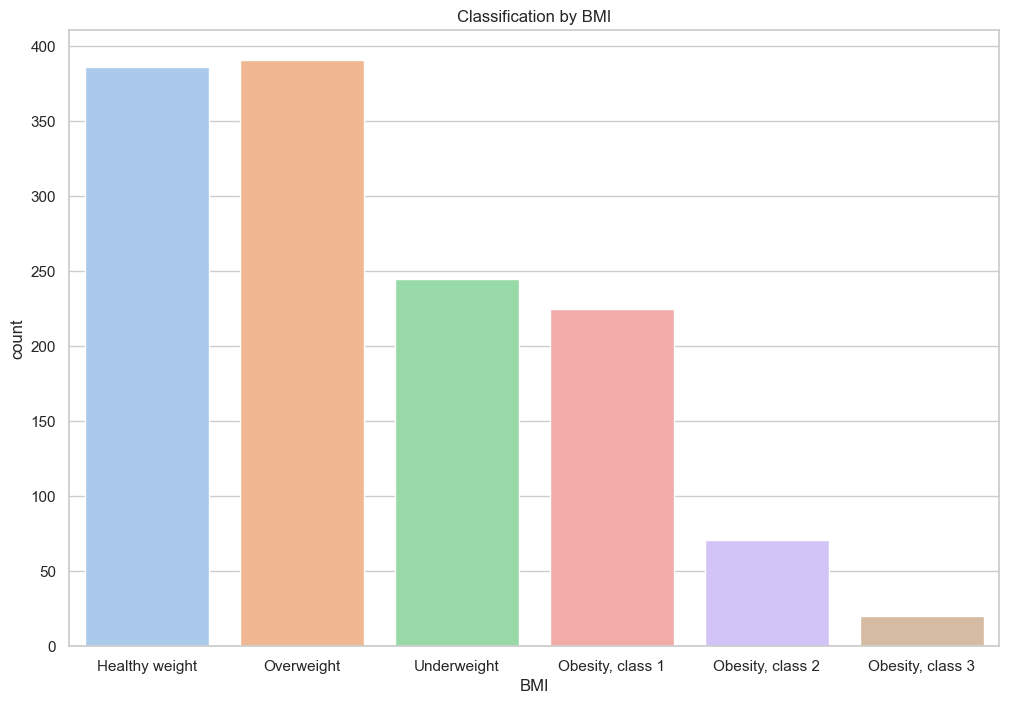

In [64]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['BMI'])
plt.title('Classification by BMI')

plt.show();

In [65]:
df['smoker'].value_counts().to_frame()

,smoker
0,1064
1,274


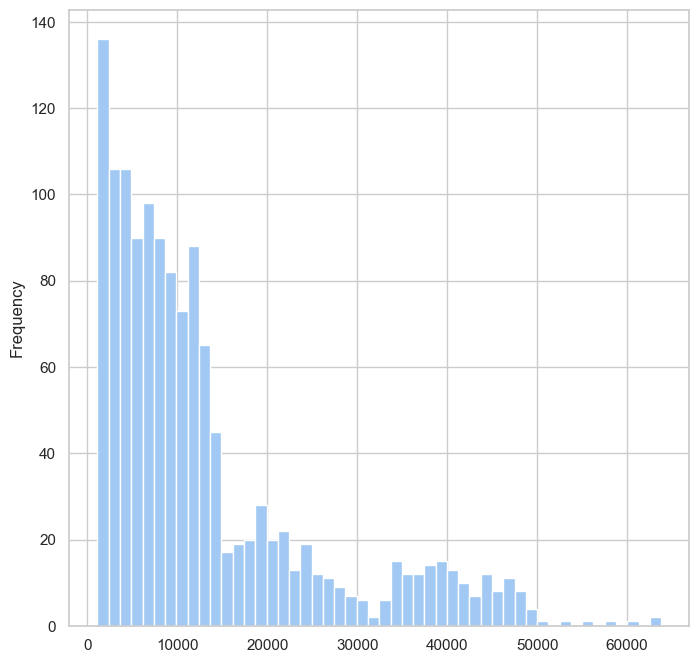

In [66]:
df['charges'].plot(kind='hist', bins=50);

Wartości po zlogarytmowaniu

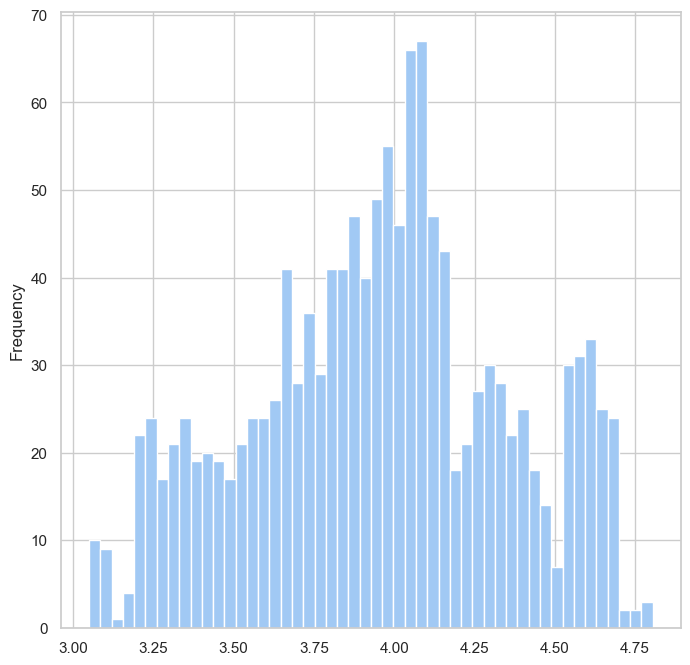

In [67]:
np.log10(df['charges']).plot(kind='hist', bins=50);

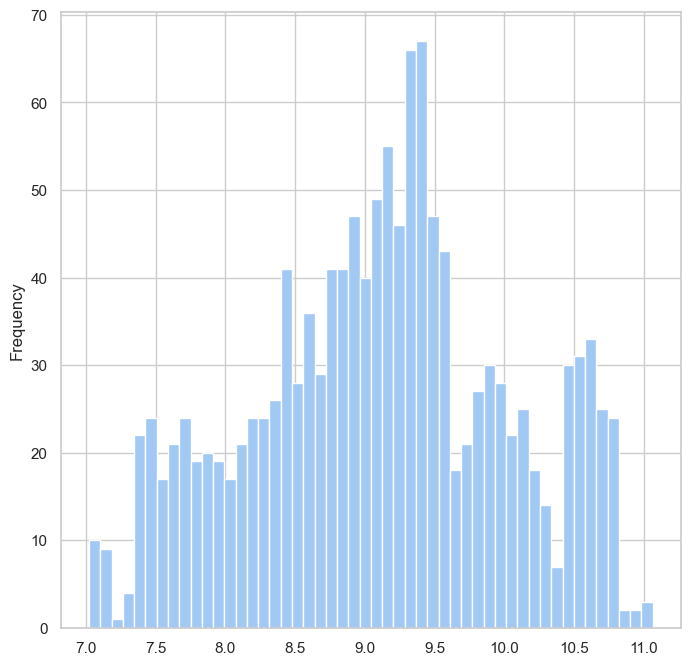

In [68]:
np.log(df['charges']).plot(kind='hist', bins=50);

In [69]:
nosmoke = df[df['smoker']==0]
smoke = df[df['smoker']==1]

In [70]:
nosmoke['charges']

index
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

/var/folders/9s/y69x5fh17nz2lg8jh5f7t_mm0000gn/T/ipykernel_23979/504123747.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


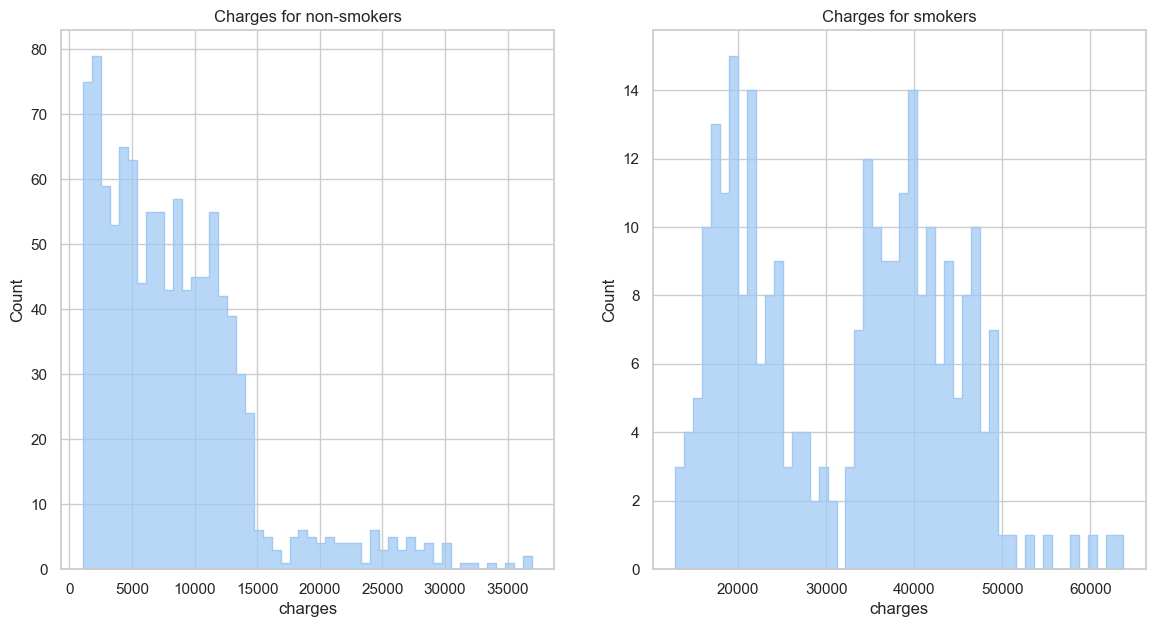

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(nosmoke['charges'], ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

In [72]:
df['sex'].value_counts().to_frame('Count')

,Count
1,676
0,662


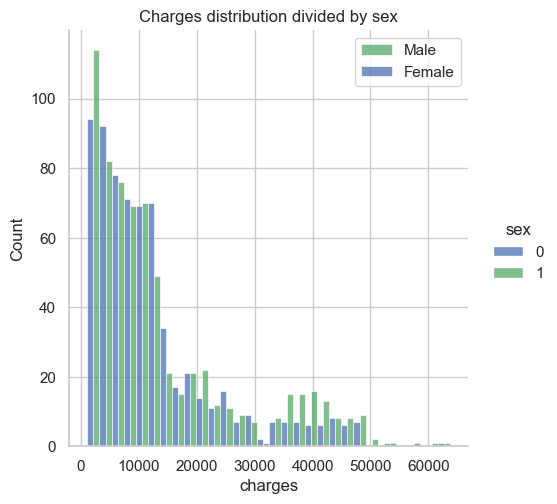

In [73]:
sns.displot(df, x='charges', hue='sex', multiple='dodge')
plt.title('Charges distribution divided by sex')
plt.legend(['Male','Female'])

plt.show()

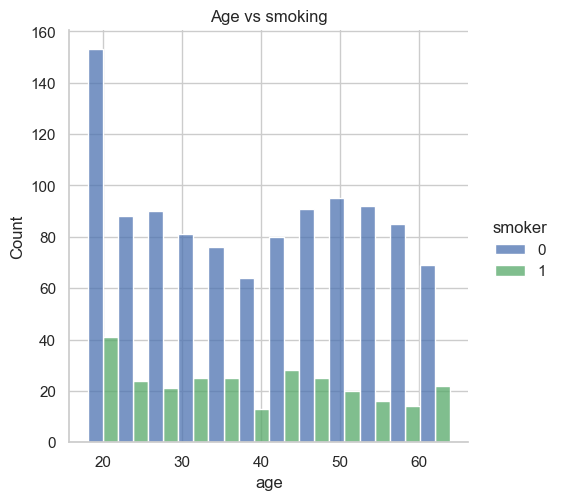

In [74]:
sns.displot(df, x='age', hue='smoker', multiple='dodge')
plt.title('Age vs smoking')

plt.show()

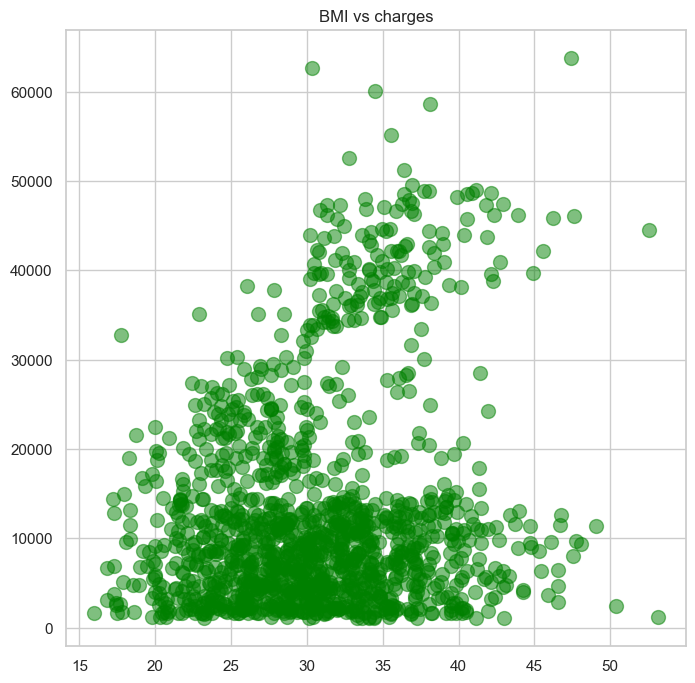

In [75]:
plt.scatter(df['bmi'], df['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

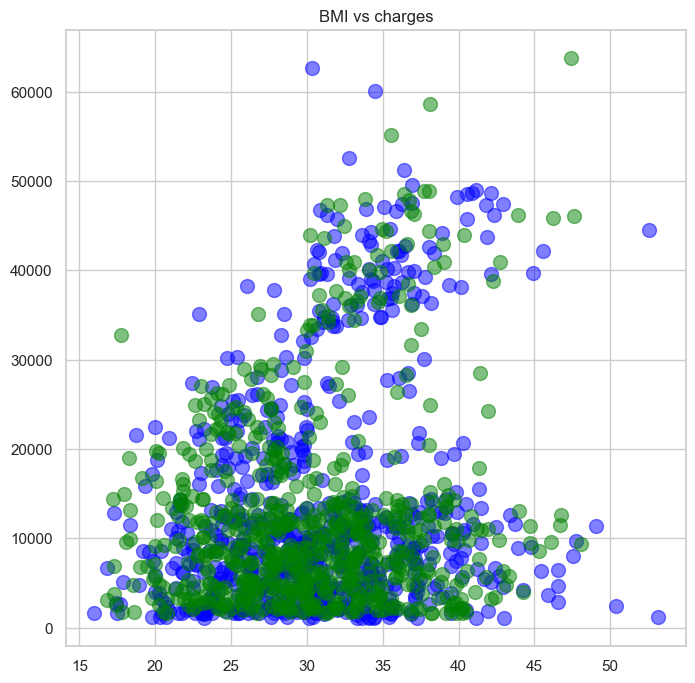

In [76]:
female = df[df['sex']==0]
male = df[df['sex']==1]
plt.scatter(male['bmi'], male['charges'],s=100, color='blue', alpha=0.5)
plt.scatter(female['bmi'], female['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

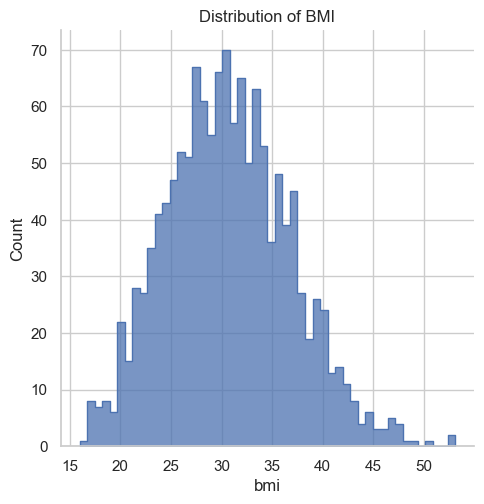

In [77]:
sns.displot(df, x='bmi',element='step', bins=50)
plt.title('Distribution of BMI')
plt.show()

In [78]:
df['children'].value_counts().to_frame()

,children
0,574
1,324
2,240
3,157
4,25
5,18


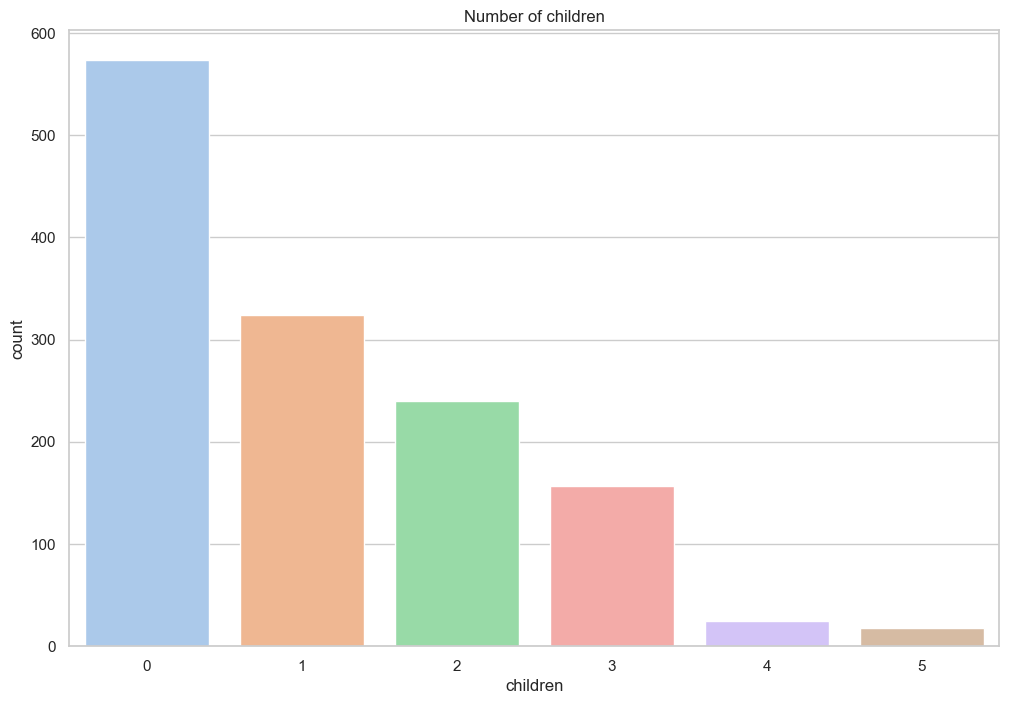

In [79]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['children'])
plt.title('Number of children')

plt.show();

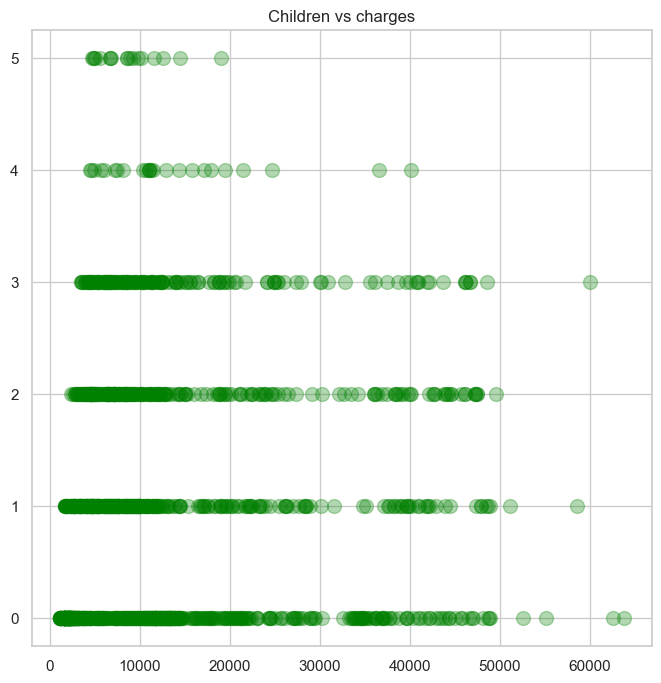

In [80]:
plt.scatter(df['charges'], df['children'],s=100, color='green', alpha=0.3)
plt.title('Children vs charges')
plt.show()

***Modele*** Regresja liniowa, random forest, SVR, poszukać innych - np. regresja wielomianowa

***Miary sukcesu***
RMSE, r^2, MAE, MAPE, wizualizacja na scatter plocie

<h2>Modelowanie<h2/>

<h3>xgboost<h3/>

In [81]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1,Healthy weight
1,18,1,33.770,1,0,1725.55230,0,0,1,0,Overweight
2,28,1,33.000,3,0,4449.46200,0,0,1,0,Overweight
3,33,1,22.705,0,0,21984.47061,0,1,0,0,Underweight
4,32,1,28.880,0,0,3866.85520,0,1,0,0,Healthy weight


In [125]:
y = df['charges']
colx = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
x = df[colx]

In [135]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [137]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=20, 
    max_depth=6,
    subsample=0.5,
    colsample_bytree=1,
)

In [138]:
params= {
'n_estimators': range(1,50,5),
'max_depth': range(1,8,2),
'subsample': [0, 0.1, 0.25,0.5, 0.75, 1],
'colsample_bytree': [0, 0.1, 0.25,0.5, 0.75, 1],
'eta': [0, 0.1, 0.25,0.5, 0.75, 1],
}

In [139]:
from sklearn.model_selection import GridSearchCV

Strojenie parametrów - trwało to 30min, bo przesadziłam z ilością parametrów, ale coś tam wyszło.  
 Wyhaszowałam, żeby nie spowalniało całości, niżej model jest fitowany na parametrach z best_params

In [88]:
#xg_search = GridSearchCV(xg_reg, params, cv=5)
#xg_search.fit(x_train, y_train)

In [89]:
#xg_search.best_params_

In [90]:
#xg_search.best_score_

In [140]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=46, 
    max_depth=3,
    subsample=0.75,
    colsample_bytree=1,
    eta=0.1
)

In [141]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=46, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [142]:
y_pred = xg_reg.predict(x_test)
y_pred

array([41741.08  , 15107.412 , 16255.54  , 39043.508 ,  7136.8174,
        3502.5366,  9732.104 ,  9702.939 , 26754.838 , 17976.344 ,
        6966.516 , 14687.631 , 34925.574 ,  5679.0864,  6134.433 ,
        4296.61  , 10728.132 , 12030.932 ,  7773.7793, 10949.235 ,
       12071.976 , 20167.129 ,  2881.4888, 13848.342 , 46508.473 ,
       40391.4   , 43721.51  , 22136.164 ,  5723.562 ,  2746.7192,
       10025.226 , 14202.867 ,  2662.9375, 14358.802 ,  5860.539 ,
       44239.484 ,  8275.411 , 20097.291 , 13127.077 , 35533.86  ,
        5332.486 ,  7284.5176, 22276.426 ,  4735.861 , 13210.087 ,
        5756.29  , 11517.569 , 11039.921 ,  4299.808 ,  3616.45  ,
       21469.965 ,  8986.35  ,  5768.4243,  6871.917 , 13186.408 ,
       13733.948 , 14016.135 , 45438.727 , 10385.649 ,  4624.3237,
        6539.2725,  4410.2246, 17199.34  , 16440.822 , 46350.047 ,
        6767.223 ,  2439.811 ,  6536.4585,  7684.4497, 41781.348 ,
        3916.1448,  7536.935 , 42021.793 ,  8539.898 , 13986.4

In [143]:
xg_reg.score(x_test, y_test) 

0.8618029777640289

In [144]:
xg_reg.score(x_train, y_train)

0.8835675769259916

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics
from matplotlib.pylab import rcParams

In [145]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("RMSE - gbtree: ", rmse)
print("MAE - gbtree: ", mae)

RMSE - gbtree:  4461.884947698451
MAE - gbtree:  2411.902182195371


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

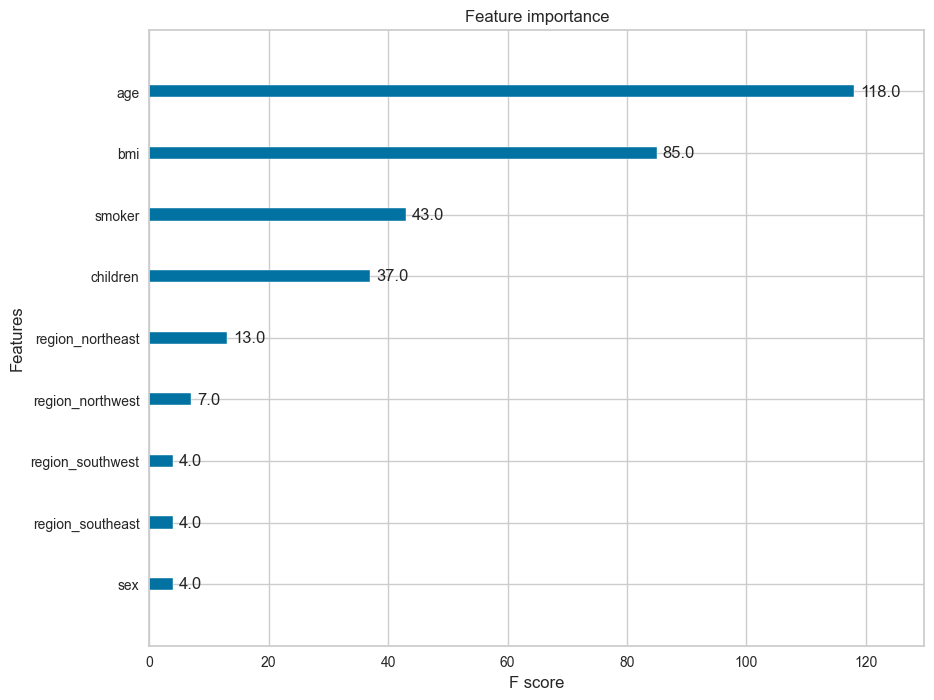

In [146]:
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xg_reg)

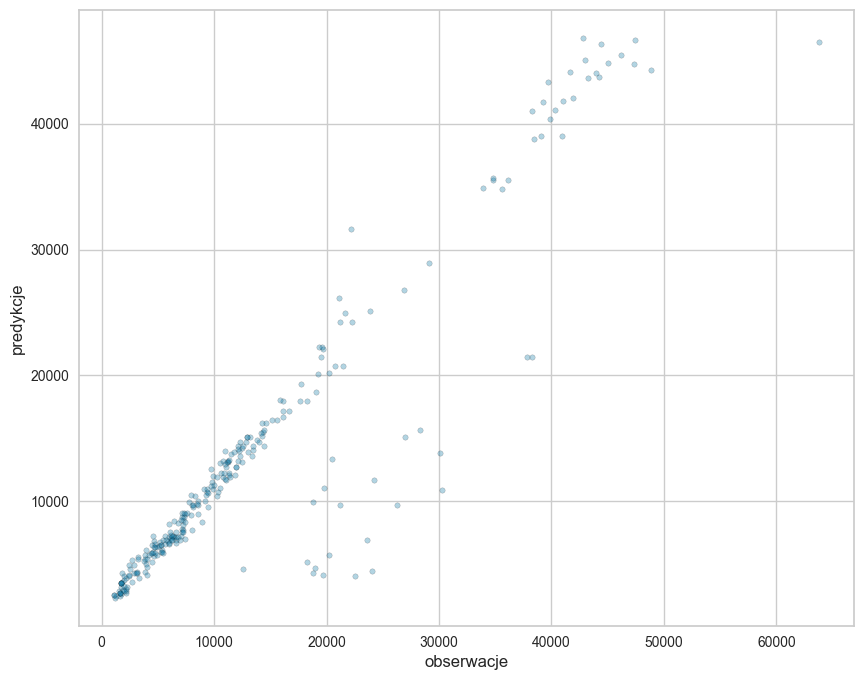

In [147]:
plt.scatter(
    y_test,
    y_pred,
    edgecolor="black",
    s=15, 
    alpha = 0.3)
plt.xlabel("obserwacje")
plt.ylabel("predykcje");

In [100]:
from sklearn.metrics import r2_score

In [148]:
r2_score(y_test, y_pred)

0.8618029777640289

In [102]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

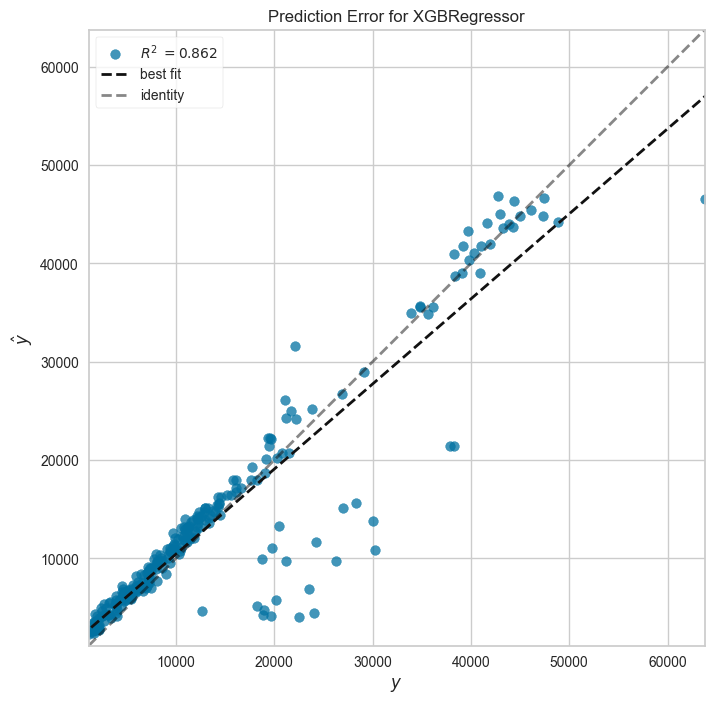

In [149]:
prediction_error(xg_reg, x_train, y_train, x_test, y_test);

R^2 wynosi 83%, czyli nasz model uwzględnia taki procent wariancji dla zbioru.    
Czarna linia oznaczałaby najlepszy model, który najlepiej przewiduje kwoty. Nasz model jest dosyć blisko tej linii.

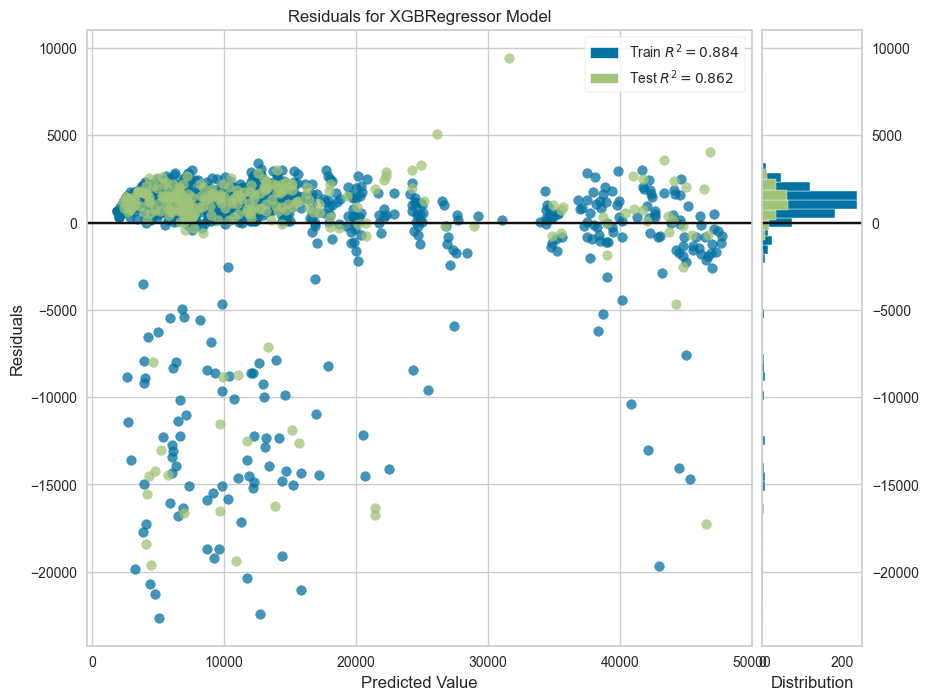

In [150]:
residuals_plot(xg_reg, x_train, y_train, x_test, y_test);

Wnioski z wykresu? rozkład normalny reszt. Reszty są skupione głównie wokół 0, czyli model zazwyczaj mało się myli.  
Pozostała część reszt jest rozproszona, te mocniej odstające są częściej ujemne. 

Chciałam sprawdzić czy standaryzacja i PCA pomogą tutaj usprawnić model

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import decomposition

In [106]:
my_scaler = StandardScaler()
my_scaler.fit(x)
x = my_scaler.transform(x)


In [107]:
x.shape

(1338, 9)

In [108]:
pca = decomposition.PCA(n_components=4)

In [109]:
X_std_pca = pca.fit_transform(x)

In [110]:
X_std_pca.shape

(1338, 4)

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X_std_pca, y, test_size=0.2)

In [112]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=46, 
    max_depth=3,
    subsample=0.75,
    colsample_bytree=1,
    eta=0.1
)

In [113]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=46, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [114]:
xg_reg.score(x_test, y_test) 

0.4154943539077066

<h2>XD<h2/>

In [115]:
xg_reg.score(x_train, y_train)

0.5953147266866619